In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
glass=pd.read_csv('glass.csv')

In [4]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# `EDA`

In [5]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# `Checking and Dropping Duplicates`

In [7]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [8]:
glass.drop_duplicates(inplace=True)

In [9]:
glass.reset_index(inplace=True)

# `Visualization`

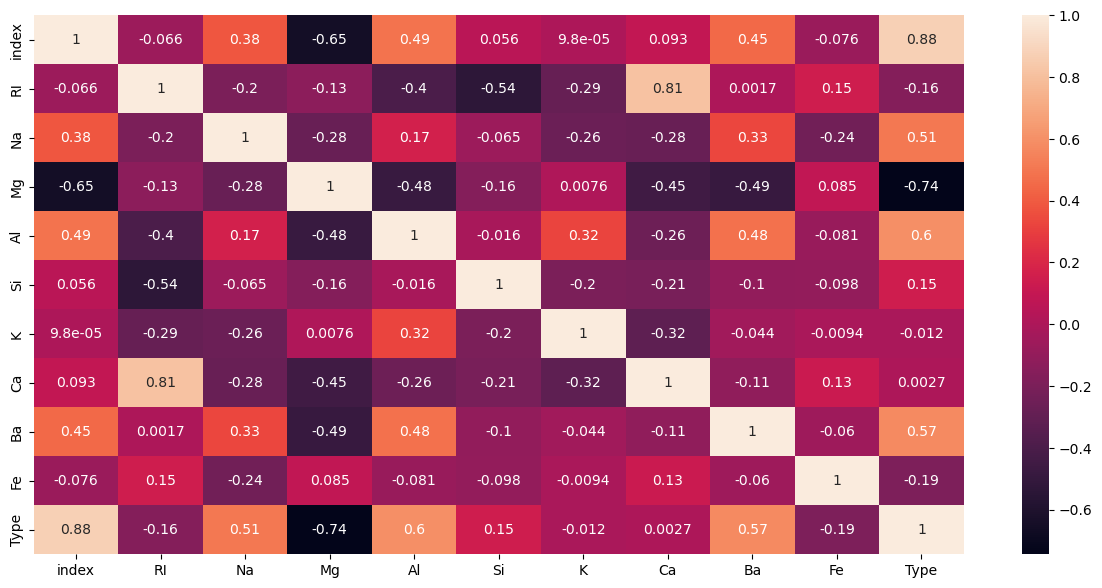

In [21]:
plt.figure(figsize=(15,7))
sns.heatmap(glass.corr(),annot=True)
plt.show()

# `Insights`
1) RI and Ca are highly positively correlated to each other.
2) Ba and Mg also Ca and Mg are negatively correlated

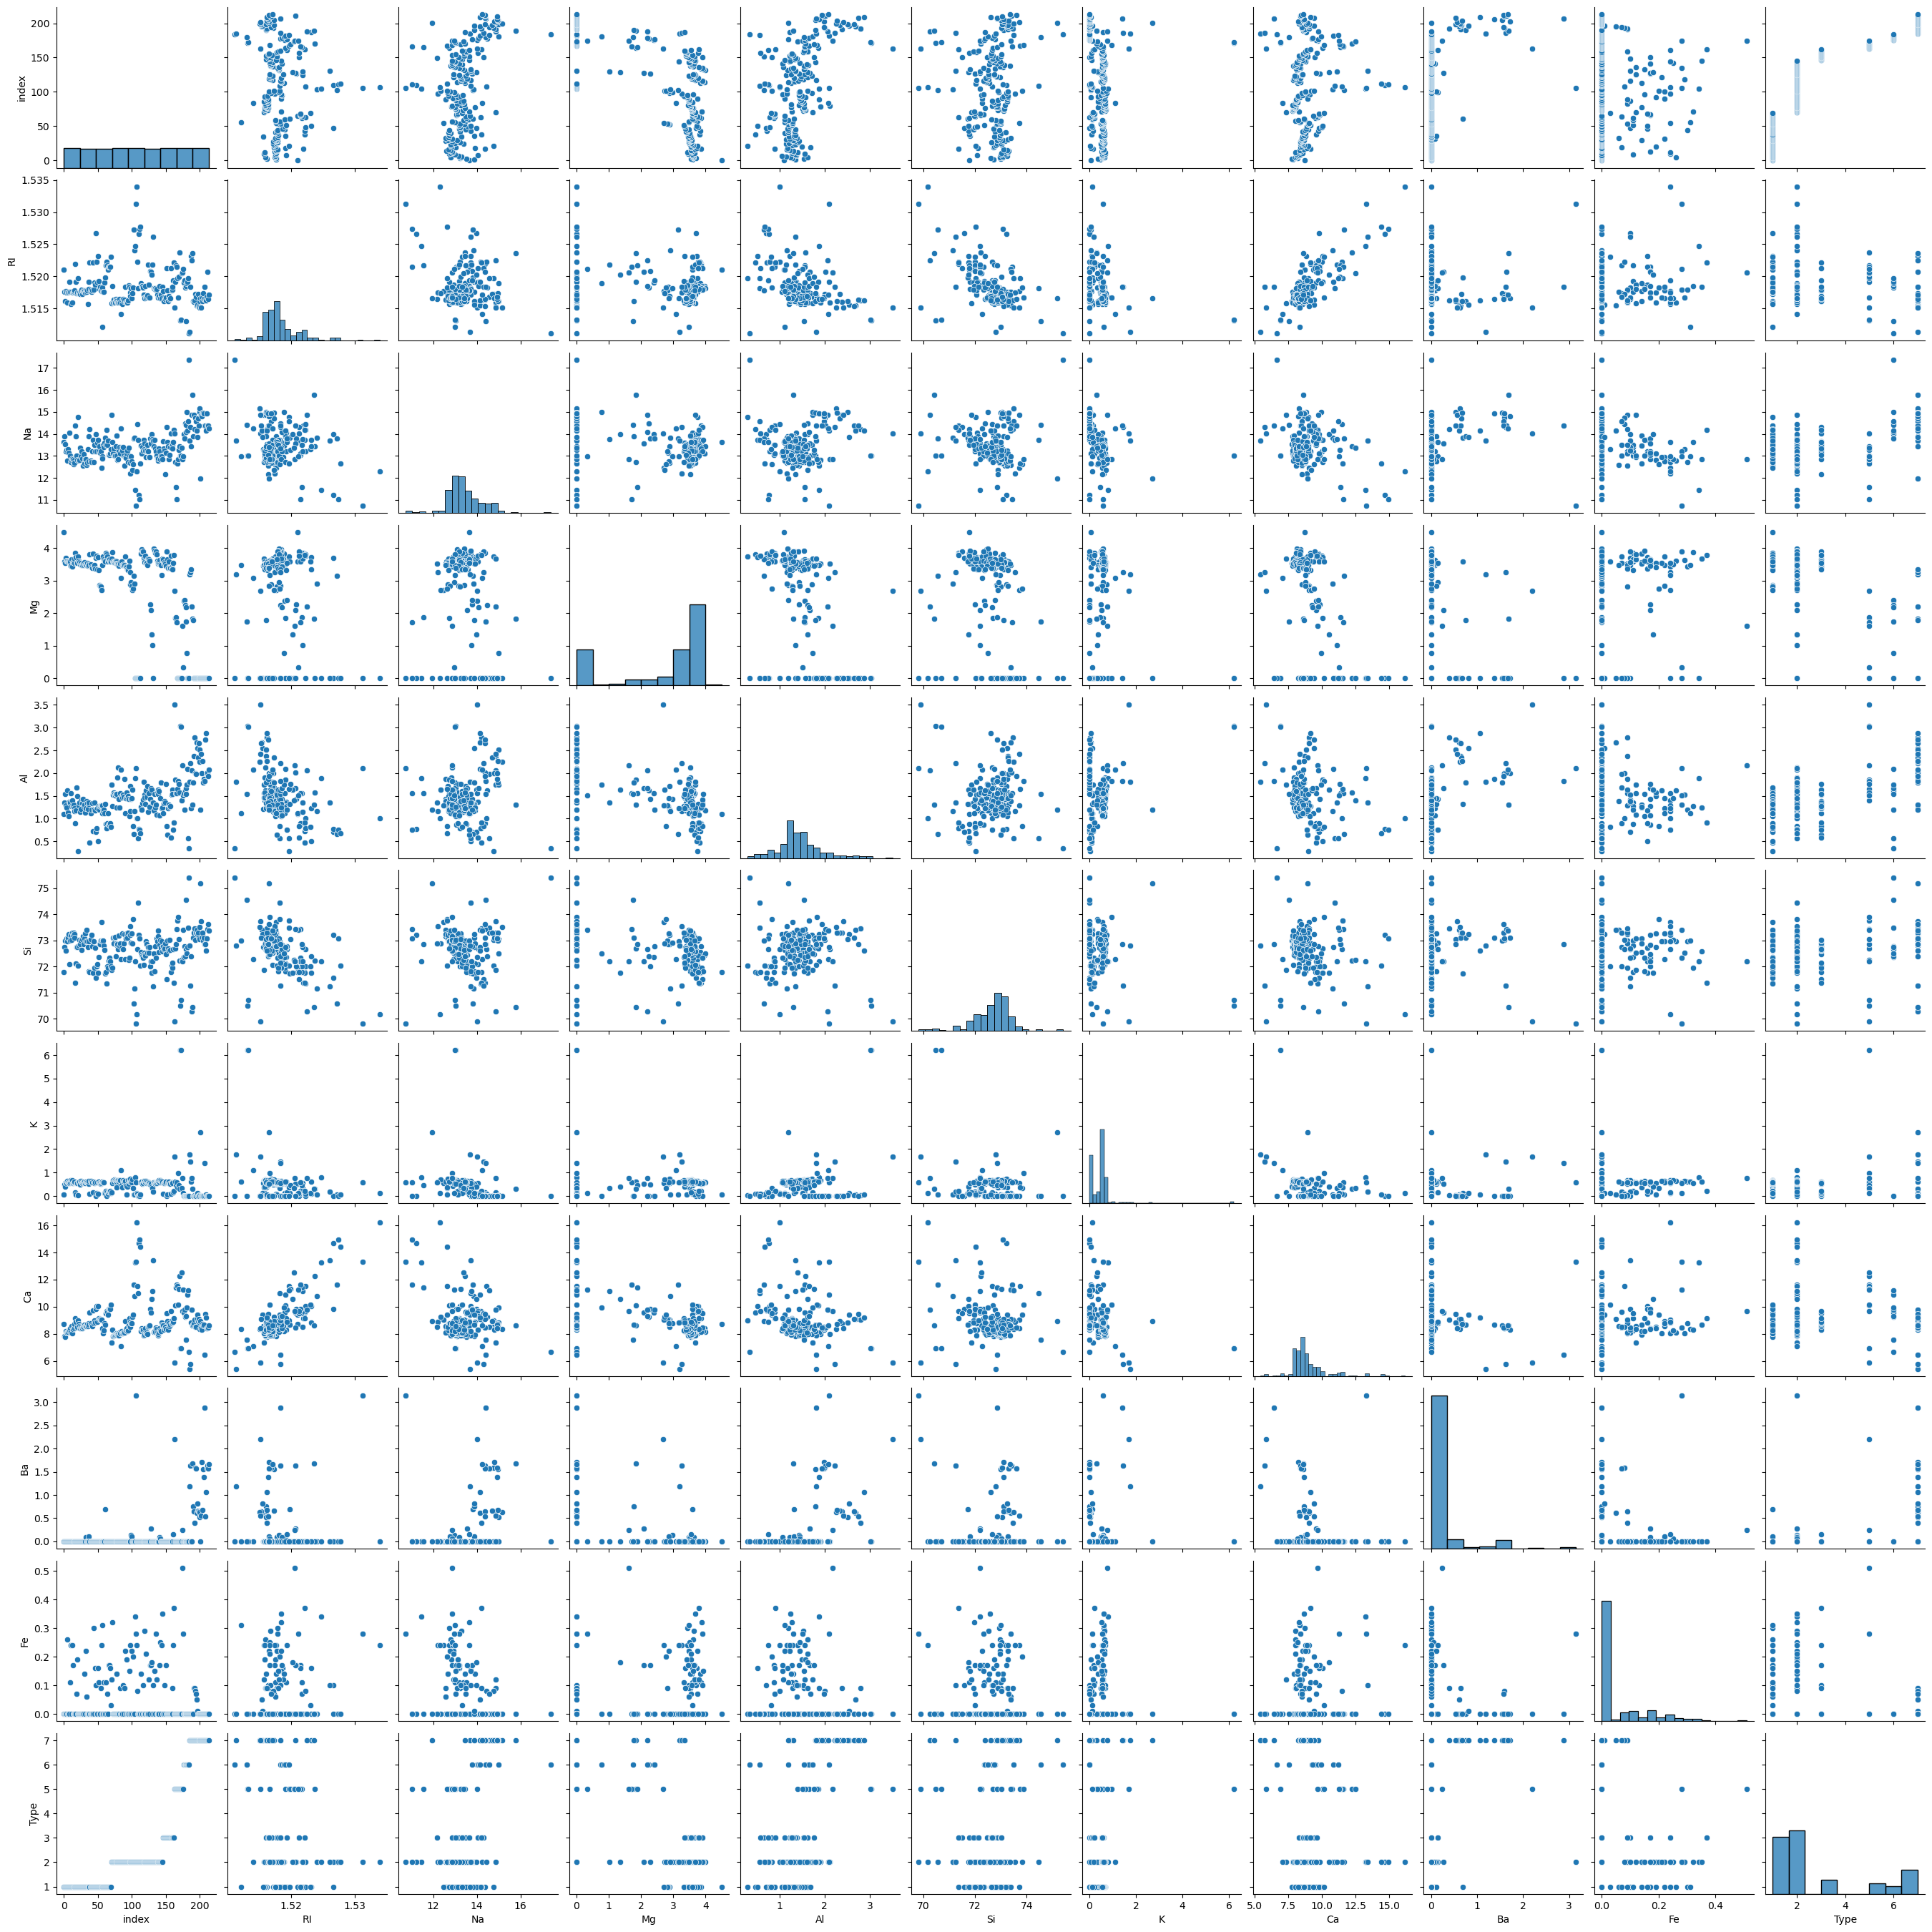

In [11]:
sns.pairplot(glass);

# `Insights`
None of the features is normally distributed. The features Fe, Ba, Ca and K exhibit the highest skew coefficients. Moreover, the distribution of potassium (K) and Barium (Ba) seem to contain many outliers.

# `KNN Model`

In [12]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [13]:
x=glass.drop('Type',axis=1)
y=glass.Type

In [14]:
model = KNeighborsClassifier(n_neighbors = 12)
model.fit(x,y)

KNeighborsClassifier(n_neighbors=12)

In [15]:
kfold = KFold(n_splits=8)
results = cross_val_score(model, x, y, cv = kfold)

In [16]:
results

array([1.        , 1.        , 0.96296296, 1.        , 1.        ,
       0.38461538, 0.15384615, 0.        ])

In [17]:
k_range = range(1, 57)
k_scores = []

In [18]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv=4)
    k_scores.append(scores.mean())

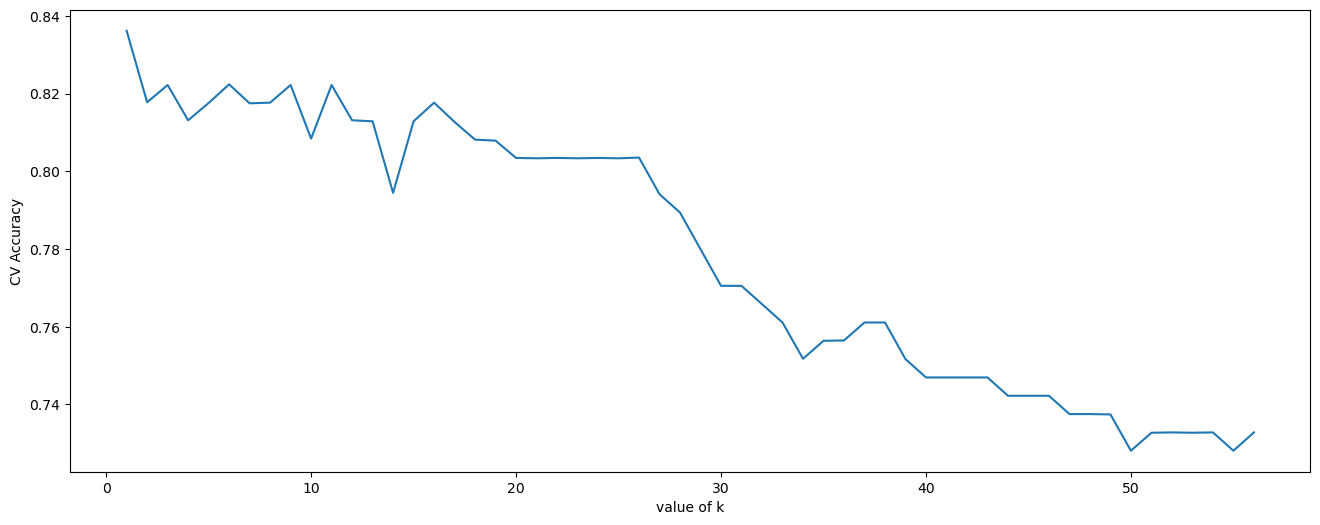

In [19]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('value of k')
plt.ylabel('CV Accuracy')
plt.show()

# `Insights`
As we can see we get maximum accuracy for k=1 followed by k=6

In [20]:
df_accuracy = pd.DataFrame({'value of k' : range(1,57),'accuracy' : k_scores})
df_accuracy.sort_values('accuracy',ascending=False)

,value of k,accuracy
0,1,0.836216
5,6,0.822414
2,3,0.822240
8,9,0.822240
10,11,0.822240
1,2,0.817785
7,8,0.817697
15,16,0.817697
4,5,0.817610
6,7,0.817523
